## Train and Analysis of Open Ended model

In [5]:
import os
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [6]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

test_y = test_tuple[2]


In [9]:
leaderboard_test_df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_masked_leaderboard_set.csv"))
leaderboard_test_tuple = (leaderboard_test_df['user_id'].values,
                          leaderboard_test_df['item_id'].values)

In [21]:
output_dir = 'leaderboard_predictions'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    
def save_predictions(model, output_filetitle, mu, b_per_user, c_per_item, U, V):
    output_filename = output_filetitle + '_predicted_ratings_leaderboard.txt'
    output_path = os.path.join(output_dir, output_filename)
    yhat = model.predict(leaderboard_test_tuple[0], leaderboard_test_tuple[1], mu=mu, b_per_user=b_per_user, c_per_item=c_per_item, U=U, V=V)
    ag_np.savetxt(output_path, yhat)
    

## Analysis - with no regularization (α=0); K = 2

In [14]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
noreg_k2_model = CollabFilterOneVectorPerItem(
    n_epochs=500, batch_size=1000, step_size=0.1,
    n_factors=2, alpha=0.0)
noreg_k2_model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
noreg_k2_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56002 | train_MAE     1.00255 | valid_MAE     1.00803 | grad_wrt_mu     0.95203 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00057 | grad_wrt_V     0.00031
epoch       0.014 | loss_total     1.42677 | train_MAE     0.99187 | valid_MAE     0.99647 | grad_wrt_mu     0.90689 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00058 | grad_wrt_V     0.00032
epoch       0.029 | loss_total     1.45318 | train_MAE     0.98171 | valid_MAE     0.98549 | grad_wrt_mu     0.86846 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00052 | grad_wrt_V     0.00031
epoch       0.043 | loss_total     1.35081 | train_MAE     0.97196 | valid_MAE     0.97495 | grad_wrt_mu     0.50863 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch       0.129 | loss_total     1.25943 | train_MAE     0

epoch      12.000 | loss_total     1.08873 | train_MAE     0.86261 | valid_MAE     0.86988 | grad_wrt_mu     0.10619 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch      13.000 | loss_total     1.07963 | train_MAE     0.85628 | valid_MAE     0.86376 | grad_wrt_mu     0.00616 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     1.07065 | train_MAE     0.85190 | valid_MAE     0.85973 | grad_wrt_mu     0.13253 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      15.000 | loss_total     1.06321 | train_MAE     0.84857 | valid_MAE     0.85680 | grad_wrt_mu     0.03412 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      16.000 | loss_total     1.05492 | train_MAE     0

epoch      62.000 | loss_total     0.91941 | train_MAE     0.76652 | valid_MAE     0.78223 | grad_wrt_mu     0.03158 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      64.000 | loss_total     0.91756 | train_MAE     0.76665 | valid_MAE     0.78283 | grad_wrt_mu     0.04483 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      66.000 | loss_total     0.91655 | train_MAE     0.76275 | valid_MAE     0.77859 | grad_wrt_mu     0.12703 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch      68.000 | loss_total     0.91270 | train_MAE     0.76234 | valid_MAE     0.77856 | grad_wrt_mu     0.10264 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      70.000 | loss_total     0.91055 | train_MAE     0

epoch     136.000 | loss_total     0.87092 | train_MAE     0.74177 | valid_MAE     0.76304 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     140.000 | loss_total     0.86912 | train_MAE     0.74049 | valid_MAE     0.76179 | grad_wrt_mu     0.14520 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     144.000 | loss_total     0.86825 | train_MAE     0.74055 | valid_MAE     0.76223 | grad_wrt_mu     0.13919 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     148.000 | loss_total     0.86873 | train_MAE     0.73888 | valid_MAE     0.76047 | grad_wrt_mu     0.09664 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     152.000 | loss_total     0.86680 | train_MAE     0

epoch     276.000 | loss_total     0.84691 | train_MAE     0.72861 | valid_MAE     0.75430 | grad_wrt_mu     0.02750 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     280.000 | loss_total     0.84674 | train_MAE     0.72738 | valid_MAE     0.75298 | grad_wrt_mu     0.00051 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     284.000 | loss_total     0.84555 | train_MAE     0.72786 | valid_MAE     0.75371 | grad_wrt_mu     0.00335 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     288.000 | loss_total     0.84516 | train_MAE     0.72783 | valid_MAE     0.75378 | grad_wrt_mu     0.02695 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     292.000 | loss_total     0.84611 | train_MAE     0

epoch     416.000 | loss_total     0.83706 | train_MAE     0.72245 | valid_MAE     0.75036 | grad_wrt_mu     0.06908 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     420.000 | loss_total     0.83677 | train_MAE     0.72242 | valid_MAE     0.75041 | grad_wrt_mu     0.05032 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     424.000 | loss_total     0.83777 | train_MAE     0.72233 | valid_MAE     0.75028 | grad_wrt_mu     0.03391 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00008 | grad_wrt_V     0.00006
epoch     428.000 | loss_total     0.83688 | train_MAE     0.72265 | valid_MAE     0.75087 | grad_wrt_mu     0.03650 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     432.000 | loss_total     0.83677 | train_MAE     0

In [15]:
print(f"Final Train MAE = {noreg_k2_model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {noreg_k2_model.trace_mae_valid[-1]}")

noreg_k2_final_mu = noreg_k2_model.param_dict['mu']
noreg_k2_final_b_per_user = noreg_k2_model.param_dict['b_per_user']
noreg_k2_final_c_per_item = noreg_k2_model.param_dict['c_per_item']
noreg_k2_final_U = noreg_k2_model.param_dict['U']
noreg_k2_final_V = noreg_k2_model.param_dict['V']

noreg_k2_test_yhat = noreg_k2_model.predict(test_tuple[0], test_tuple[1], mu=noreg_k2_final_mu, b_per_user=noreg_k2_final_b_per_user, c_per_item=noreg_k2_final_c_per_item, U=noreg_k2_final_U, V=noreg_k2_final_V)
noreg_k2_test_mae = ag_np.mean(ag_np.absolute(test_y - noreg_k2_test_yhat))
print(f"Final Test MAE = {noreg_k2_test_mae}")

Final Train MAE = 0.7212616205895953
Final Valid MAE = 0.749751997378097
Final Test MAE = 0.7416190895402393


Text(0.5, 1.0, 'Vector Baseline Model Loss over Epochs, K = 2')

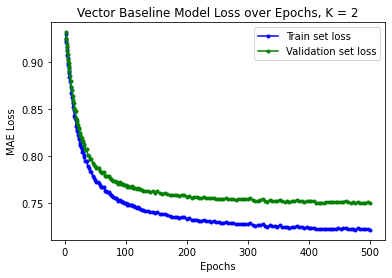

In [16]:
noreg_k2_epochs = ag_np.array(noreg_k2_model.trace_epoch)
noreg_k2_epochs_of_interest = ag_np.argwhere(noreg_k2_epochs >= 2.0)

noreg_k2_train_loss = ag_np.array(noreg_k2_model.trace_mae_train)[noreg_k2_epochs_of_interest]
noreg_k2_valid_loss = ag_np.array(noreg_k2_model.trace_mae_valid)[noreg_k2_epochs_of_interest]

plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_train_loss, 'b.-', label='Train set loss')
plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Vector Baseline Model Loss over Epochs, K = 2')

In [22]:
save_predictions(noreg_k2_model, 
                 'noreg_k2_model', 
                 noreg_k2_final_mu, 
                 noreg_k2_final_b_per_user, 
                 noreg_k2_final_c_per_item, 
                 noreg_k2_final_U, 
                 noreg_k2_final_V)
#MAE on Leaderboard = 0.7401

## Using Surprise

In [34]:
from surprise import accuracy, BaselineOnly, Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

### Baseline model

In [35]:
# movie data loaded into a pandas dataframe
df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_all_development_set.csv"))

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9459  0.9433  0.9459  0.9475  0.9453  0.9456  0.0013  
MAE (testset)     0.7509  0.7462  0.7484  0.7546  0.7499  0.7500  0.0028  
Fit time          0.33    0.42    0.39    0.36    0.37    0.37    0.03    
Test time         0.20    0.11    0.11    0.18    0.11    0.14    0.04    


{'test_rmse': array([0.94593153, 0.94329908, 0.94586547, 0.94748469, 0.94533002]),
 'test_mae': array([0.75092657, 0.74621599, 0.74836685, 0.75461334, 0.74986745]),
 'fit_time': (0.32837605476379395,
  0.4180569648742676,
  0.3900129795074463,
  0.35918116569519043,
  0.3659648895263672),
 'test_time': (0.19675898551940918,
  0.10978984832763672,
  0.11285400390625,
  0.18480205535888672,
  0.10832476615905762)}

### Using SVD

In [42]:
from surprise.model_selection import KFold

# define a cross-validation iterator
kf = KFold(n_splits=5)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Mean Absolute Error
    accuracy.mae(predictions, verbose=True)

MAE:  0.7523
MAE:  0.7441
MAE:  0.7508


In [29]:
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.mae(predictions)

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7491  0.7418  0.7473  0.7388  0.7389  0.7432  0.0043  
Fit time          4.02    4.06    4.09    4.09    4.07    4.07    0.03    
Test time         0.10    0.10    0.10    0.17    0.10    0.11    0.03    


{'test_mae': array([0.74906329, 0.74175483, 0.74730513, 0.73878851, 0.73889772]),
 'fit_time': (4.020789861679077,
  4.061262130737305,
  4.09473991394043,
  4.0887322425842285,
  4.0674519538879395),
 'test_time': (0.09655976295471191,
  0.09821486473083496,
  0.10126805305480957,
  0.16718697547912598,
  0.09628105163574219)}